In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import neurobiases
import numpy as np
import os

from sklearn.utils.extmath import cartesian

%matplotlib inline

In [2]:
results_path = os.path.join(os.environ['HOME'], 'fits/neurobiases/exp5.npz')

In [3]:
results = np.load(results_path)

In [4]:
list(results)

['scores',
 'bics',
 'a_est',
 'a_true',
 'b_est',
 'b_true',
 'B_est',
 'B_true',
 'Psi_est',
 'Psi_true',
 'L_est',
 'L_true',
 'X',
 'Y',
 'y',
 'n_iterations']

In [5]:
a_true = results['a_true'][:]
a_est = results['a_est'][:]
b_true = results['b_true'][:]
b_est = results['b_est'][:]
B_true = results['B_true'][:].reshape((10, 10))
B_est = results['B_est'][:]
Psi_true = results['Psi_true'][:]
Psi_est = results['Psi_est'][:]
scores = results['scores'][:].reshape((30, 30, -1))
bics = results['bics'][:].reshape((30, 30, -1))
n_iterations = results['n_iterations'][:]

In [6]:
N = a_true.size
M = b_true.size

In [7]:
ticks = [0, 6, 12, 18, 24, 29]
xticklabels = ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1']
yticklabels = ['1e-4', '1e-3', '1e-2', '1e-1', '1e-0', '1e1']

# Ground Truth Parameters

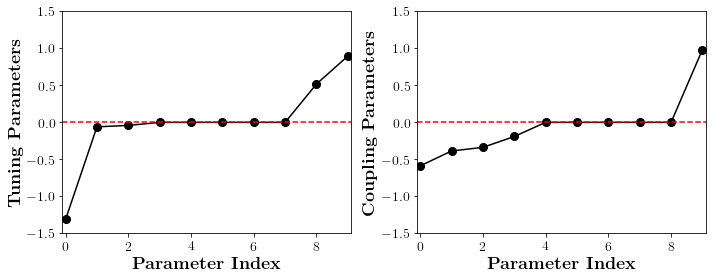

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(np.sort(a_true), color='black', marker='o', markersize=8)
axes[1].plot(np.sort(b_true), color='black', marker='o', markersize=8)

for ax in axes:
    ax.set_ylim([-1.5, 1.5])
    ax.set_xlim([-0.1, 9.1])
    ax.axhline(0, color='r', linestyle='--')
    ax.tick_params(labelsize=14)
    ax.set_xlabel(r'\textbf{Parameter Index}', fontsize=18)
    
axes[0].set_ylabel(r'\textbf{Tuning Parameters}', fontsize=18)
axes[1].set_ylabel(r'\textbf{Coupling Parameters}', fontsize=18)
plt.tight_layout()
plt.savefig('exp5_ground_truth_parameters.pdf')
plt.show()

# Cross-validated Log-likelihood

In [16]:
mean_lls = np.mean(scores, axis=2)
best_ll = np.unravel_index(np.argmax(mean_lls), mean_lls.shape)

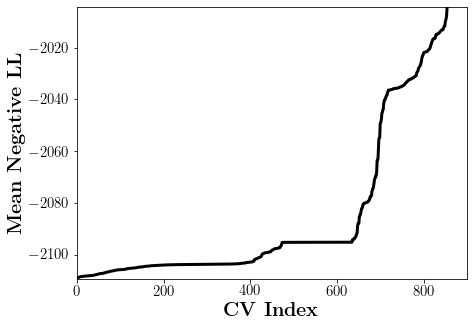

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(np.sort(-mean_lls.ravel()), linewidth=3, color='black')
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean Negative LL}', fontsize=20)

ax.set_xlim([0, 900])
ax.set_ylim([-np.max(mean_lls), -np.percentile(mean_lls, q=5)])
ax.tick_params(labelsize=15)
plt.savefig('exp5_ll.pdf', bbox_inches='tight')
plt.show()

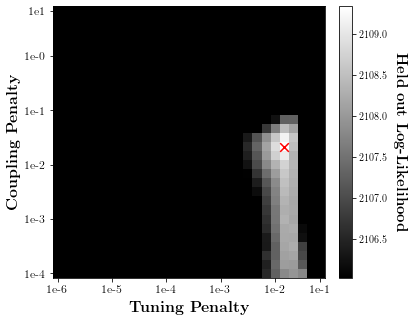

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_lls, vmin=np.percentile(mean_lls, q=90), vmax=np.max(mean_lls))
ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(xticklabels, fontsize=12)
ax.set_yticklabels(yticklabels, fontsize=12)

ax.scatter(best_ll[1], best_ll[0], color='red', marker='x', s=75)

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Held out Log-Likelihood}', fontsize=15, labelpad=20, rotation=270)
plt.savefig('exp5_ll_grid.pdf', bbox_inches='tight')
plt.show()

# Bayesian Information Criterion

In [22]:
mean_bics = np.mean(bics, axis=-1)
best_bic = np.unravel_index(np.argmin(mean_bics), mean_bics.shape)

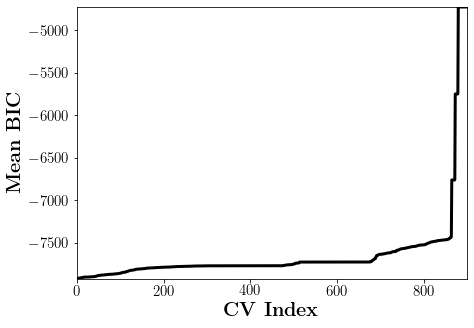

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(np.sort(mean_bics.ravel()), linewidth=3, color='black')
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean BIC}', fontsize=20)

ax.set_xlim([0, 900])
ax.set_ylim([mean_bics.min(), mean_bics.max()])
ax.tick_params(labelsize=15)
plt.savefig('exp5_bic.pdf', bbox_inches='tight')
plt.show()

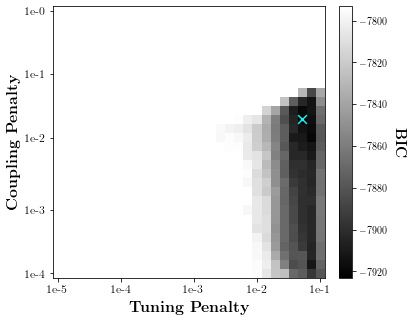

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_bics, vmin=np.min(mean_bics), vmax=np.percentile(mean_bics, q=20))

ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks([0, 7, 15, 22, 29])
ax.set_yticks([0, 7, 15, 22, 29])
ax.set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)
ax.set_yticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)

ax.scatter(best_bic[1], best_bic[0], color='cyan', marker='x', s=75)

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{BIC}', fontsize=15, labelpad=20, rotation=270)
plt.savefig('exp5_bic_grid.pdf', bbox_inches='tight')
plt.show()

# Selection Ratio

In [27]:
a_srs = np.median((np.count_nonzero(a_est, axis=2) / N).reshape((30, 30, -1)), axis=2)
b_srs = np.median((np.count_nonzero(b_est, axis=2) / M).reshape((30, 30, -1)), axis=2)
B_srs = np.median((np.count_nonzero(B_est, axis=(2, 3)) / (N * M)).reshape((30, 30, -1)), axis=2)

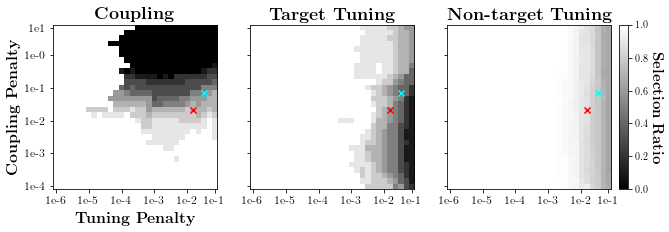

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

axes[0].imshow(a_srs, vmin=0, vmax=1)
axes[1].imshow(b_srs, vmin=0, vmax=1)
img = axes[2].imshow(B_srs, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

axes[0].set_xticks(ticks)
axes[1].set_yticks(ticks)

for ax in axes:
    ax.set_xticklabels(xticklabels, fontsize=12)
    ax.set_yticklabels(yticklabels, fontsize=12)
    ax.scatter(best_ll[1], best_ll[0], color='red', marker='x')
    ax.scatter(best_bic[1], best_bic[0], color='cyan', marker='x')

    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Ratio}', fontsize=15, labelpad=15, rotation=270)
plt.savefig('exp5_selection_ratio.pdf', bbox_inches='tight')
plt.show()

# Selection Accuracy

In [29]:
a_est_masks = a_est != 0
b_est_masks = b_est != 0
B_est_masks = B_est != 0

In [30]:
b_mask = b_true != 0
a_mask = a_true != 0
B_mask = B_true != 0

In [31]:
a_norm = np.sum(a_est_masks, axis=2) + np.sum(a_mask)
b_norm = np.sum(b_est_masks, axis=2) + np.sum(b_mask)
B_norm = np.sum(B_est_masks, axis=(2, 3)) + np.sum(B_mask)

In [32]:
a_sa = np.median(1 - np.sum(a_est_masks != a_mask, axis=2) / a_norm, axis=1).reshape((30, 30))
b_sa = np.median(1 - np.sum(b_est_masks != b_mask, axis=2) / b_norm, axis=1).reshape((30, 30))
B_sa = np.median(1 - np.sum(B_est_masks != B_mask, axis=(2, 3)) / B_norm, axis=1).reshape((30, 30))

In [33]:
mean_sa = (a_sa + b_sa + B_sa) / 3

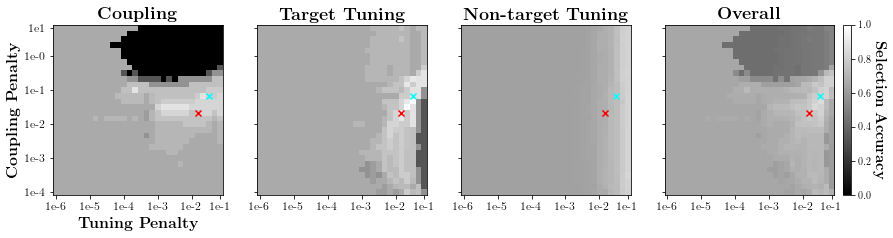

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True)

axes[0].imshow(a_sa, vmin=0, vmax=1)
axes[1].imshow(b_sa, vmin=0, vmax=1)
axes[2].imshow(B_sa, vmin=0, vmax=1)
img = axes[3].imshow(mean_sa, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

axes[0].set_xticks(ticks)
axes[1].set_yticks(ticks)

for ax in axes:
    ax.set_xticklabels(xticklabels, fontsize=12)
    ax.set_yticklabels(yticklabels, fontsize=12)
    ax.scatter(best_ll[1], best_ll[0], color='red', marker='x')
    ax.scatter(best_bic[1], best_bic[0], color='cyan', marker='x')

axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)
axes[3].set_title(r'\textbf{Overall}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[3].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Accuracy}', fontsize=15, labelpad=15, rotation=270)
plt.savefig('exp5_selection_acc.pdf', bbox_inches='tight')
plt.show()

# Bias 

In [35]:
b_mask = b_true != 0
a_mask = a_true != 0
a_nz = a_true[a_mask]
b_nz = b_true[b_mask]

In [36]:
a_bias = np.mean(np.median(a_est - a_true, axis=1).reshape((30, 30, -1)), axis=-1)
b_bias = np.mean(np.median(b_est - b_true, axis=1).reshape((30, 30, -1)), axis=-1)
B_bias = np.mean(np.median(B_est - B_true, axis=1).reshape((30, 30, 10, 10)), axis=(2, 3))

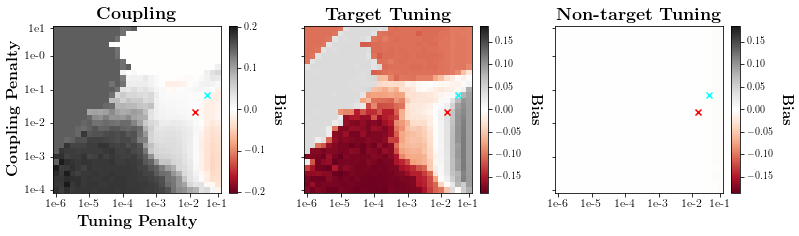

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

ext_c = np.max(np.abs(a_bias))
ext_t = np.max([np.abs(b_bias), np.abs(B_bias)])
img1 = axes[0].imshow(a_bias, vmin=-ext_c, vmax=ext_c, cmap='RdGy')
img2 = axes[1].imshow(b_bias, vmin=-ext_t, vmax=ext_t, cmap='RdGy')
img3 = axes[2].imshow(B_bias, vmin=-ext_t, vmax=ext_t, cmap='RdGy')

axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)

for ax in axes:
    ax.set_xticklabels(xticklabels, fontsize=12)
    ax.set_yticklabels(yticklabels, fontsize=12)
    ax.scatter(best_ll[1], best_ll[0], color='red', marker='x')
    ax.scatter(best_bic[1], best_bic[0], color='cyan', marker='x')
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img3, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

plt.savefig('exp5_bias.pdf', bbox_inches='tight')
plt.show()

# Bias (Ground Truth Non-Zero) 

In [39]:
a_nz_bias = np.mean(np.median((a_est[..., a_mask] - a_nz), axis=1).reshape((30, 30, -1)), axis=-1)
b_nz_bias = np.mean(np.median((b_est[..., b_mask] - b_nz), axis=1).reshape((30, 30, -1)), axis=-1)

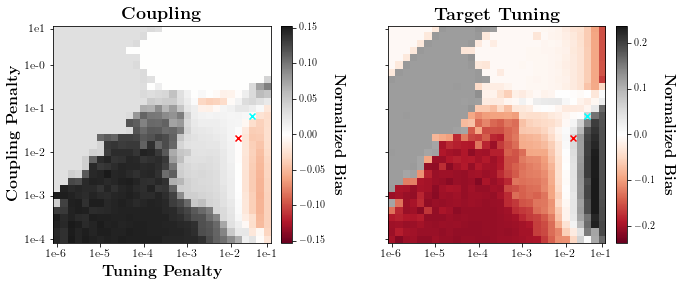

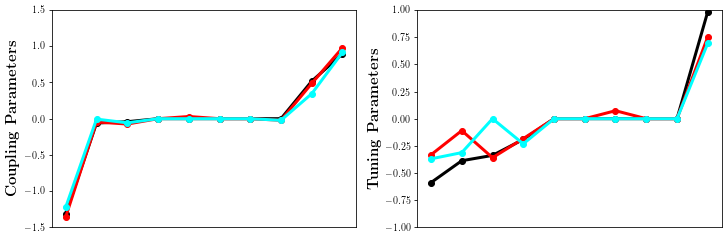

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

ext_c = np.max(np.abs(a_nz_bias))
ext_t = np.max([np.abs(b_nz_bias), np.abs(B_bias)])

img1 = axes[0].imshow(a_nz_bias, vmin=-ext_c, vmax=ext_c, cmap='RdGy')
img2 = axes[1].imshow(b_nz_bias, vmin=-ext_t, vmax=ext_t, cmap='RdGy')

axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)

for ax in axes:
    ax.set_xticklabels(xticklabels, fontsize=12)
    ax.set_yticklabels(yticklabels, fontsize=12)
    ax.scatter(best_ll[1], best_ll[0], color='red', marker='x')
    ax.scatter(best_bic[1], best_bic[0], color='cyan', marker='x')
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Normalized Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Normalized Bias}', fontsize=15, labelpad=20, rotation=270)
plt.savefig('exp5_bias_nz.pdf', bbox_inches='tight')

plt.show()

### second plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sorted_idx = np.argsort(a_true)
axes[0].plot(
    a_true[sorted_idx],
    color='k',
    marker='o',
    linewidth=3)
axes[0].plot(
    np.median(a_est[np.argmax(mean_lls.ravel())], axis=0)[sorted_idx],
    color='red',
    marker='o',
    linewidth=3)
axes[0].plot(
    np.median(a_est[np.argmin(mean_bics.ravel())], axis=0)[sorted_idx],
    color='cyan',
    marker='o',
    linewidth=3)

sorted_idx = np.argsort(b_true)
axes[1].plot(
    b_true[sorted_idx],
    color='k',
    marker='o',
    linewidth=3)
axes[1].plot(
    np.median(b_est[np.argmax(mean_lls.ravel())], axis=0)[sorted_idx],
    color='red',
    marker='o',
    linewidth=3)
axes[1].plot(
    np.median(b_est[np.argmin(mean_bics.ravel())], axis=0)[sorted_idx],
    color='cyan',
    marker='o',
    linewidth=3)
    
for ax in axes:
    ax.tick_params(labelsize=10)
    ax.set_xticks([])
    
axes[0].set_ylim([-1.5, 1.5])
axes[1].set_ylim([-1, 1])

axes[0].set_ylabel(r'\textbf{Coupling Parameters}', fontsize=15)
axes[1].set_ylabel(r'\textbf{Tuning Parameters}', fontsize=15)
plt.savefig('exp5_examples.pdf', bbox_inches='tight')

plt.show()